In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Prepare Data
# The CIFAR10 dataset is a color and mixed dataset.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Compress pixels between 0-1 (Normalize)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Base Model :

In [4]:
# 2. We are establishing the CNN Model.
model = models.Sequential([

    # --- INTRODUCTION LAYER ---
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # --- INTERMEDIATE LAYER (Going Deeper) ---
    # In the first layer, we found simple lines. Now, let's INCREASE the number of filters to find shapes.
    # Generally, the number of filters doubles as the layers progress (32 -> 64).
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # --- DECISION-MAKING LAYER (BRAIN) ---
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # QUESTION 3: Output Layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile and Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Since this dataset is challenging, let's iterate through it 10 times (epochs).
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3867 - loss: 1.6866 - val_accuracy: 0.5495 - val_loss: 1.2780
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5886 - loss: 1.1661 - val_accuracy: 0.6161 - val_loss: 1.1081
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6550 - loss: 0.9977 - val_accuracy: 0.6539 - val_loss: 0.9917
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6822 - loss: 0.9086 - val_accuracy: 0.6724 - val_loss: 0.9456
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7149 - loss: 0.8185 - val_accuracy: 0.6942 - val_loss: 0.9089
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7348 - loss: 0.7608 - val_accuracy: 0.6918 - val_loss: 0.9310
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 52ms/step - accuracy: 0.7535 - loss: 0.7052 - val_accuracy: 0.6939 - val_loss: 0.9212
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7650 -

# Augmented Model :

  - We apply Data Augmentation and Dropout (0.5) to prevent overfit.

In [7]:
# Class names (Necessary for reading results)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [8]:
# --- WEAPON 1: DATA AUGMENTATION LAYER ---

# This layer only works during training; it is disabled during testing.
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"), # Flip the image horizontally
  layers.RandomRotation(0.1),      # Rotate by 10%
  layers.RandomZoom(0.1),          # Zoom in/out a little
])

In [9]:
# 2. We are installing the model (Improved Version)
model = models.Sequential([

    # Let's first distort/varietiate the images a bit.
    data_augmentation,

    # CNN Section (Eyes)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classification Section (Brain)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # --- WEAPON 2: DROPOUT ---
    # Randomly shut down half (50%) of the neurons.
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Start Training (Let's do 15 laps this time because learning has become difficult!)
print("The training is starting... (Please be patient, the Augmentation process is slow)")
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

The training is starting... (Please be patient, the Augmentation process is slow)
Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 63ms/step - accuracy: 0.2488 - loss: 2.0120 - val_accuracy: 0.4443 - val_loss: 1.5131
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 65ms/step - accuracy: 0.4286 - loss: 1.5814 - val_accuracy: 0.5114 - val_loss: 1.3190
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4906 - loss: 1.4428 - val_accuracy: 0.5463 - val_loss: 1.2516
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.5099 - loss: 1.3877 - val_accuracy: 0.5710 - val_loss: 1.1997
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5266 - loss: 1.3378 - val_accuracy: 0.5956 - val_loss: 1.1454
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5406 - loss: 1.3062 - val_accuracy: 0.5637 - val_loss: 1.2395
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5500 - loss: 1.2787 - val_accuracy: 0.6085 - val_loss

# Model Testing !!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


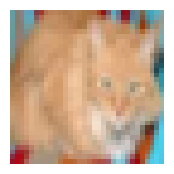

Real One: Cat
AI Prediction: Cat
Confidence Rate: %58.85
Result: ✅ Succeed!


In [12]:
# --- TEST TIME ---
import numpy as np
# 1. Let's choose a random image from the test set.
random_number = np.random.randint(0, 1000)
choosed_image = test_images[random_number]
real_tag = test_labels[random_number][0]

# 2. Let's give it to the official model (We need to make its dimensions (1, 32, 32, 3) because the batch is waiting)
img_for_prediction = np.expand_dims(choosed_image, 0)
predictions = model.predict(img_for_prediction)

# 3. Let's read the result.
predicted_indeks = np.argmax(predictions)
predicted_name = class_names[predicted_indeks]
real_name = class_names[real_tag]
confidence_rate = 100 * np.max(predictions)

# 4. Let's print the result to the screen.
plt.figure(figsize=(2,2))
plt.imshow(choosed_image)
plt.axis('off')
plt.show()

print(f"Real One: {real_name}")
print(f"AI Prediction: {predicted_name}")
print(f"Confidence Rate: %{confidence_rate:.2f}")

if real_name == predicted_name:
    print("Result: ✅ Succeed!")
else:
    print("Result: ❌ Fail!")